# Project 4:

# Predicting price of houses on basis of different house features using Linear Regression:
######
| **Prepared by:** | Rayyan Ahmed.
|----------|----------------------------------------------------|
| **Date:** | 31th May, 2024

###
## Importing fetch_california_housing:
###

In [129]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

california = fetch_california_housing()
cal = pd.DataFrame( data = california.data, columns = california.feature_names)
cal['MedHouseVal'] = california.target
b = cal.head(200)
b.to_csv('california200.csv', index = False)

###
## Preparing DataFrame:
###

In [130]:
a = pd.read_csv('california200.csv')
a

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
195,1.6929,20.0,3.510355,1.152367,1659.0,2.454142,37.80,-122.26,1.150
196,1.6471,52.0,2.833333,0.927536,520.0,3.768116,37.77,-122.22,0.950
197,2.5900,52.0,4.389961,1.162162,866.0,3.343629,37.77,-122.22,0.964
198,2.5700,52.0,4.202186,1.125683,612.0,3.344262,37.77,-122.23,0.720


###
## Plotting DataFrame:
###

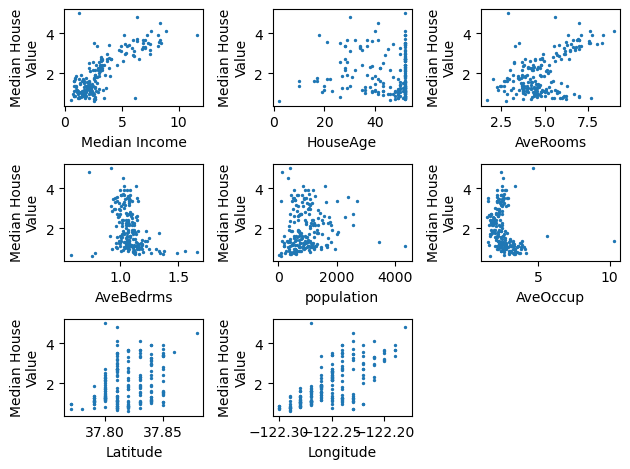

In [131]:
import matplotlib.pyplot as plt

plt.subplot(3,3,1)
plt.scatter(a.MedInc, a.MedHouseVal,s = 2)
plt.xlabel('Median Income')
plt.ylabel('Median House\nValue')

plt.subplot(3,3,2)
plt.scatter(a.HouseAge, a.MedHouseVal,s = 2)
plt.xlabel('HouseAge')
plt.ylabel('Median House\nValue')

plt.subplot(3,3,3)
plt.scatter(a.AveRooms, a.MedHouseVal,s = 2)
plt.xlabel('AveRooms')
plt.ylabel('Median House\nValue')

plt.subplot(3,3,4)
plt.scatter(a.AveBedrms, a.MedHouseVal,s = 2)
plt.xlabel('AveBedrms')
plt.ylabel('Median House\nValue')

plt.subplot(3,3,5)
plt.scatter(a.Population, a.MedHouseVal,s = 2)
plt.xlabel('population')
plt.ylabel('Median House\nValue')

plt.subplot(3,3,6)
plt.scatter(a.AveOccup, a.MedHouseVal,s = 2)
plt.xlabel('AveOccup')
plt.ylabel('Median House\nValue')

plt.subplot(3,3,7)
plt.scatter(a.Latitude, a.MedHouseVal,s = 2)
plt.xlabel('Latitude')
plt.ylabel('Median House\nValue')

plt.subplot(3,3,8)
plt.scatter(a.Longitude, a.MedHouseVal,s = 2)
plt.xlabel('Longitude')
plt.ylabel('Median House\nValue')

plt.tight_layout()
plt.show()

###
## Correlation:
###

In [132]:
a.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.048705,0.733616,-0.235616,0.012830,-0.130696,0.311876,0.724536,0.797934
HouseAge,-0.048705,1.000000,0.167486,0.056922,-0.150548,0.207683,0.052659,-0.042930,-0.076905
AveRooms,0.733616,0.167486,1.000000,0.173776,-0.138919,0.011874,0.358739,0.367419,0.501191
AveBedrms,-0.235616,0.056922,0.173776,1.000000,-0.009217,0.066997,-0.117556,-0.344384,-0.328883
Population,0.012830,-0.150548,-0.138919,-0.009217,1.000000,-0.165061,-0.055860,0.176667,0.091618
AveOccup,-0.130696,0.207683,0.011874,0.066997,-0.165061,1.000000,-0.329222,-0.112538,-0.255555
Latitude,0.311876,0.052659,0.358739,-0.117556,-0.055860,-0.329222,1.000000,-0.060414,0.332109
Longitude,0.724536,-0.042930,0.367419,-0.344384,0.176667,-0.112538,-0.060414,1.000000,0.670362
MedHouseVal,0.797934,-0.076905,0.501191,-0.328883,0.091618,-0.255555,0.332109,0.670362,1.000000


###
## Seperating Independent values and Dependent Value:
###

In [133]:
x = a.drop(['MedHouseVal'], axis = 1)
y = a['MedHouseVal']

###
## train_test_split:
###

In [134]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

###
## Shapes:
###

In [135]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((160, 8), (40, 8), (160,), (40,))

###
## Training Algorithm:
###

In [136]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit( x_train, y_train )

LinearRegression()

###
## Predicting values of unseen dataset(x_test):
###

In [137]:
model.predict(x_test)

array([1.63819803, 1.70889841, 1.98705401, 1.59919856, 1.87138334,
       1.63022468, 2.41612826, 3.09786755, 2.10779975, 2.04628239,
       2.42278483, 3.18432468, 1.80608106, 3.58944588, 1.35313705,
       2.16258317, 1.30311453, 3.63841321, 1.42768262, 1.28478712,
       1.68122474, 2.80832525, 1.85906384, 1.87548757, 1.73035011,
       2.8062477 , 1.88484783, 1.86052781, 3.24323701, 1.92577595,
       1.86258025, 1.20913391, 2.37675139, 2.01580468, 1.49640022,
       1.3591795 , 3.304306  , 2.28573518, 1.08336115, 2.08692073])

###
## Test DataSet:
### Actual vs Predicted Values:
###

In [138]:
pd.DataFrame({'Actual Values (y_test)': y_test, 'Predicted Values (model.predict(x_test))': model.predict(x_test)})

,Actual Values (y_test),Predicted Values (model.predict(x_test))
18,1.587,1.638198
170,1.250,1.708898
107,2.594,1.987054
98,1.700,1.599199
177,1.827,1.871383
182,1.279,1.630225
5,2.697,2.416128
146,2.737,3.097868
12,2.135,2.107800
152,2.695,2.046282


###
## coef_ and intercept_ :
###

In [139]:
model.coef_, model.intercept_

(array([ 3.31052919e-01, -5.67876919e-04, -6.01664610e-02, -5.44498947e-01,
         9.35037418e-05, -5.57696211e-02,  5.98171956e+00,  5.81601046e+00]),
 486.67659672429556)

###
## Predicting Program:
###

In [140]:
input_str = input('Enter features (comma seperated):' )
features = list(map(float, input_str.split(',')))
features_array = np.array(features).reshape(1, -1)
prediction = model.predict(features_array)
print('\nPredicted House Value according to given features is:', prediction)

Enter features (comma seperated):8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23

Predicted House Value according to given features is: [4.01588616]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


###
## Evaluating Model Performance:
###

In [193]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np

print(f'R2:{r2_score(y_test, model.predict(x_test))}')
print(f'Mean Absolute Error(MAE): {mean_absolute_error(y_test, model.predict(x_test))}')
print(f'Mean Squared Error(MSE): {mean_squared_error(y_test, model.predict(x_test))}')
print(f'Root Mean Squared Error: {np.sqrt(mean_absolute_error(y_test, model.predict(x_test)))}')

R2:0.6702006008623037
Mean Absolute Error(MAE): 0.40663567237611853
Mean Squared Error(MSE): 0.27847994125673775
Root Mean Squared Error: 0.6376799137311121


###
## Standardization:
###

###
## Importing StandardScalar:
###

In [152]:
from sklearn.preprocessing import StandardScaler

###
## Standardizing Orignal DataFrame:
###

In [166]:
a1 = a.copy()
scalar = StandardScaler()
a1_scaled_ = scalar.fit_transform(a1)
a1_scaled_

a1_scaled = pd.DataFrame(a1_scaled_, columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal'])
a1_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.496609,-0.288748,1.559586,-0.456668,-1.064751,-0.001096,3.153477,0.841887,2.566484
1,2.485137,-2.133787,1.019297,-0.909925,2.496983,-0.529854,2.132108,1.228962,1.626325
2,1.981944,0.726022,2.504025,-0.023418,-0.766655,0.291573,1.621423,0.454813,1.562382
3,1.203873,0.726022,0.714540,-0.026795,-0.660437,-0.010125,1.621423,0.067738,1.454479
4,0.337792,0.726022,1.050959,0.043222,-0.648445,-0.444883,1.621423,0.067738,1.463471
...,...,...,...,...,...,...,...,...,...
195,-0.700069,-2.226038,-0.956321,0.665433,1.225791,-0.121405,-0.931999,-0.319337,-0.806498
196,-0.722144,0.726022,-1.446659,-1.296980,-0.725538,1.437383,-2.464053,1.228962,-1.006320
197,-0.267679,0.726022,-0.319259,0.750930,-0.132773,0.933808,-2.464053,1.228962,-0.992332
198,-0.277318,0.726022,-0.455257,0.432526,-0.567924,0.934559,-2.464053,0.841887,-1.236114


###
## Seperating Independent Values(x) and Dependent Values(y):
###

In [172]:
x1 = a1_scaled.drop(['MedHouseVal'], axis = 1)
y1 = a1_scaled['MedHouseVal']

###
## train_test_split:
###

In [177]:
from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, random_state = 0, test_size = 0.2)

###
## Shapes & Values:
###

In [185]:
x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape

((160, 8), (40, 8), (160,), (40,))

###
## Training Algorithm:
###

In [187]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(x1_train, y1_train)

LinearRegression()

###
## Predicting values of unseen dataset(x1_test):
###

In [188]:
model1.predict(x1_test)

array([-0.31873685, -0.24809966,  0.0298073 , -0.35770145, -0.08575998,
       -0.32670307,  0.45849799,  1.13962787,  0.15044509,  0.08898273,
        0.46514861,  1.22600772, -0.15100389,  1.63076678, -0.60354301,
        0.20517955, -0.65352082,  1.67969033, -0.52906407, -0.67183184,
       -0.27574859,  0.8503444 , -0.09806847, -0.08165942, -0.22666714,
        0.8482687 , -0.07230752, -0.09660581,  1.28486738, -0.03141599,
       -0.0945552 , -0.74741742,  0.41915632,  0.05853226, -0.4604079 ,
       -0.59750596,  1.34588179,  0.32822147, -0.87307775,  0.12958474])

###
## Actual Values (y1_test) vs Predicted Values (model1.predict(x1_test)):
###

In [190]:
pd.DataFrame({'Actual Values (y1_test) ': y1_test, 'model1.predict(x1_test)': model1.predict(x1_test)})

,Actual Values (y1_test),model1.predict(x1_test)
18,-0.369889,-0.318737
170,-0.706588,-0.248100
107,0.636211,0.029807
98,-0.256990,-0.357701
177,-0.130104,-0.085760
182,-0.677614,-0.326703
5,0.739119,0.458498
146,0.779083,1.139628
12,0.177621,0.150445
152,0.737120,0.088983


###
## Predicting Program:
###

In [211]:
input_str = input('Enter features (comma seperated):' )
features = list(map(float, input_str.split(',')))
features_array = np.array(features).reshape(1, -1)
prediction = model1.predict(features_array)
prediction_ = ( prediction * 1.0008947026927946) + 1.9572200499999999
print(f'\nPredicted House Value according to given features is: {prediction}, i.e: ({prediction_})')

Enter features (comma seperated):2.496609, -0.288748, 1.559586, -0.456668, -1.064751, -0.001096, 3.153477, 0.841887

Predicted House Value according to given features is: [2.05682642], i.e: ([4.01588672])


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


###
## Evaluating Model Performance:
###

In [191]:
print(f'R2:{r2_score(y1_test, model1.predict(x1_test))}')
print(f'Mean Absolute Error(MAE): {mean_absolute_error(y1_test, model1.predict(x1_test))}')
print(f'Mean Squared Error(MSE): {mean_squared_error(y1_test, model1.predict(x1_test))}')
print(f'Root Mean Squared Error: {np.sqrt(mean_absolute_error(y1_test, model1.predict(x1_test)))}')

R2:0.6702006008622916
Mean Absolute Error(MAE): 0.40627217956306294
Mean Squared Error(MSE): 0.27798229571683736
Root Mean Squared Error: 0.6373948380423731


###
## Comparision of test dataset:
###

In [195]:
pd.DataFrame({'Actual Price': y_test, 'Predicted Price': model.predict(x_test), 'Actual Price (standardized)': y1_test, 'Predicted Price (standardized)': model1.predict(x1_test)})


,Actual Price,Predicted Price,Actual Price (standardized),Predicted Price (standardized)
18,1.587,1.638198,-0.369889,-0.318737
170,1.250,1.708898,-0.706588,-0.248100
107,2.594,1.987054,0.636211,0.029807
98,1.700,1.599199,-0.256990,-0.357701
177,1.827,1.871383,-0.130104,-0.085760
182,1.279,1.630225,-0.677614,-0.326703
5,2.697,2.416128,0.739119,0.458498
146,2.737,3.097868,0.779083,1.139628
12,2.135,2.107800,0.177621,0.150445
152,2.695,2.046282,0.737120,0.088983


###
## Comparision of train dataset:
###

In [196]:
pd.DataFrame({'Actual Price': y_train, 'Predicted Price': model.predict(x_train), 'Actual Price (standardized)': y1_train, 'Predicted Price (standardized)': model1.predict(x1_train)})


,Actual Price,Predicted Price,Actual Price (standardized),Predicted Price (standardized)
134,3.352,3.967273,1.393533,2.008256
66,0.844,0.883823,-1.112225,-1.072438
26,0.938,1.764145,-1.018309,-0.192903
113,2.241,2.095517,0.283526,0.138173
168,1.250,1.632395,-0.706588,-0.324534
...,...,...,...,...
67,0.813,0.915202,-1.143197,-1.041086
192,0.750,1.557740,-1.206141,-0.399123
117,2.341,2.198734,0.383437,0.241298
47,1.375,1.349743,-0.581700,-0.606934


###
## Comparision of whole dataset:
###

In [197]:
pd.DataFrame({'Actual Price': y, 'Predicted Price': model.predict(x), 'Actual Price (standardized)': y1, 'Predicted Price (standardized)': model1.predict(x1)})


,Actual Price,Predicted Price,Actual Price (standardized),Predicted Price (standardized)
0,4.526,4.015886,2.566484,2.056826
1,3.585,4.250301,1.626325,2.291031
2,3.521,3.315556,1.562382,1.357122
3,3.413,2.891827,1.454479,0.933771
4,3.422,2.285735,1.463471,0.328221
...,...,...,...,...
195,1.150,1.448827,-0.806498,-0.507938
196,0.950,1.452055,-1.006320,-0.504713
197,0.964,1.598820,-0.992332,-0.358079
198,0.720,1.541415,-1.236114,-0.415434
